# Director Gender Bias in Movie Ratings

### Import Statements

In [1]:
!pip install scikit-surprise

In [2]:
import random
from sklearn import linear_model
from matplotlib import pyplot as plt
from collections import defaultdict
import gzip
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score

import json
import numpy
import dateutil.parser
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import scipy.optimize
from sklearn import svm
import string
import random

from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.matrix_factorization import SVD
# from implicit.als import AlternatingLeastSquares
import numpy as np
import os
import tarfile
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import jaccard_score

In [3]:
#Install AIF360
!pip install 'aif360'

In [4]:
# Install TensorFlow
!pip install 'tensorflow==2.6.0'

  Using cached tensorflow-2.6.0-cp39-cp39-macosx_10_11_x86_64.whl (199.0 MB)
  Using cached numpy-1.19.5-cp39-cp39-macosx_10_9_x86_64.whl (15.6 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 2.1.0
    Uninstalling absl-py-2.1.0:
      Successfully uninstalled absl-py-2.1.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the p

In [5]:
pip install 'aif360[LawSchoolGPA]'

  Using cached numpy-1.26.3-cp39-cp39-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.3-cp39-cp39-macosx_10_9_x86_64.whl (20.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.26.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade tensorflow aif360

  Using cached tensorflow-2.15.0-cp39-cp39-macosx_10_15_x86_64.whl.metadata (4.2 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
Using cached tensorflow-2.15.0-cp39-cp39-macosx_10_15_x86_64.whl (239.1 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.15.0
    Uninstalling absl-py-0.15.0:
      Successfully uninstalled absl-py-0.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install protobuf==3.19.0

  Using cached protobuf-3.19.0-cp39-cp39-macosx_10_9_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.15.1 requires protobuf<4.24,>=3.19.6, but you have protobuf 3.19.0 which is incompatible.
tensorflow 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install 'aif360[AdversarialDebiasing]'

  Using cached protobuf-4.25.2-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached protobuf-4.23.4-cp37-abi3-macosx_10_9_universal2.whl.metadata (540 bytes)
Using cached protobuf-4.23.4-cp37-abi3-macosx_10_9_universal2.whl (400 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.0
    Uninstalling protobuf-3.19.0:
      Successfully uninstalled protobuf-3.19.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import DisparateImpactRemover
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df

### Reading File Path (Ratings, Users, Movies, Directors, Titles)

In [10]:
# Update the file paths based on your extraction path
extract_path = ""

# Ratings File
ratings_file = os.path.join(extract_path, "ratings.dat")
ratings_columns = ["UserID", "MovieID", "Rating", "Timestamp"]
ratings_df = pd.read_csv(ratings_file, sep="::", engine="python", header=None, names=ratings_columns, encoding='latin1')

# Users File
users_file = os.path.join(extract_path, "users.dat")
users_columns = ["UserID", "Gender", "Age", "Occupation", "Zip-code"]
users_df = pd.read_csv(users_file, sep="::", engine="python", header=None, names=users_columns, encoding='latin1')

# Movies File
movies_file = os.path.join(extract_path, "movies.dat")
movies_columns = ["MovieID", "Title", "Genres"]
movies_df = pd.read_csv(movies_file, sep="::", engine="python", header=None, names=movies_columns, encoding='latin1')

In [11]:
# Directors File
directors_file = os.path.join(extract_path, "directors.json")
directors_df = pd.read_json(directors_file)

In [12]:
# Titles File
titles_file = os.path.join(extract_path, "title.basics.tsv.gz")
titles_df = pd.read_csv(titles_file, compression='gzip', sep='\t', encoding='utf-8')

<ipython-input-12-e9ceaab42893>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles_df = pd.read_csv(titles_file, compression='gzip', sep='\t', encoding='utf-8')


### Separting Title of Movie from the Year in Movies Dataframe

In [13]:
import re

# Separate title of movie from the year
movies_df['Year'] = movies_df['Title'].apply(lambda x: re.search(r'\((\d{4})\)', x).group(1) if re.search(r'\((\d{4})\)', x) else None)
movies_df['Title'] = movies_df['Title'].apply(lambda x: re.sub(r'\(\d{4}\)', '', x).strip())
movies_df

,MovieID,Title,Genres,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


### For Titles Dataframe, We Want the Title Type to Only Be Movies

In [14]:
# Filter to get titles that are only associated with movies
titles_df = titles_df[titles_df['titleType'] == 'movie']
titles_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
...,...,...,...,...,...,...,...,...,...
10501478,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
10501505,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
10501517,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
10501527,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama


### Merge the Movies Dataframe and Titled Dataframe Together Given Movie Title and Year

In [15]:
# Merge datasets using Title of movie and year

movie_ids = pd.merge(movies_df, titles_df, left_on=['Title', 'Year'], right_on=['primaryTitle', 'startYear'], how='left')
movie_ids

,MovieID,Title,Genres,Year,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,1,Toy Story,Animation|Children's|Comedy,1995,tt0114709,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy"
1,2,Jumanji,Adventure|Children's|Fantasy,1995,tt0113497,movie,Jumanji,Jumanji,0,1995,\N,104,"Adventure,Comedy,Family"
2,3,Grumpier Old Men,Comedy|Romance,1995,tt0113228,movie,Grumpier Old Men,Grumpier Old Men,0,1995,\N,101,"Comedy,Romance"
3,4,Waiting to Exhale,Comedy|Drama,1995,tt0114885,movie,Waiting to Exhale,Waiting to Exhale,0,1995,\N,124,"Comedy,Drama,Romance"
4,5,Father of the Bride Part II,Comedy,1995,tt0113041,movie,Father of the Bride Part II,Father of the Bride Part II,0,1995,\N,106,"Comedy,Family,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3948,Meet the Parents,Comedy,2000,tt0212338,movie,Meet the Parents,Meet the Parents,0,2000,\N,108,"Comedy,Romance"
3896,3949,Requiem for a Dream,Drama,2000,tt0180093,movie,Requiem for a Dream,Requiem for a Dream,0,2000,\N,102,Drama
3897,3950,Tigerland,Drama,2000,tt0170691,movie,Tigerland,Tigerland,0,2000,\N,101,"Drama,War"
3898,3951,Two Family House,Drama,2000,tt0202641,movie,Two Family House,Two Family House,0,2000,\N,108,"Comedy,Drama,Romance"


### Get Director Gender Given Movie Using Directors Dataframe

In [16]:
# Find gender of each movie identifier associated with the director

genders = directors_df.explode('movies_list')
genders = pd.concat([genders.drop(['movies_list'], axis=1),
                         genders['movies_list'].apply(pd.Series)], axis=1)

### Merging Datasets from Movie and Gender (Director) Datafrane Given Movie ID

In [17]:
# Combine datasets based on movie identifier 

merged_df = pd.merge(movie_ids, genders, left_on='tconst', right_on='movie_id', how='left')
merged_df = merged_df.loc[:, ['MovieID', 'Title', 'Genres', 'Year', 'male_count', 'gender', 'name', 'female_count']]
merged_df

,MovieID,Title,Genres,Year,male_count,gender,name,female_count
0,1,Toy Story,Animation|Children's|Comedy,1995,37.0,male,John Lasseter,4.0
1,2,Jumanji,Adventure|Children's|Fantasy,1995,11.0,male,Joe Johnston,0.0
2,3,Grumpier Old Men,Comedy|Romance,1995,3.0,male,Howard Deutch,0.0
3,4,Waiting to Exhale,Comedy|Drama,1995,116.0,male,Forest Whitaker,5.0
4,5,Father of the Bride Part II,Comedy,1995,2.0,male,Charles Shyer,0.0
...,...,...,...,...,...,...,...,...
4075,3948,Meet the Parents,Comedy,2000,8.0,male,Jay Roach,0.0
4076,3949,Requiem for a Dream,Drama,2000,33.0,male,Darren Aronofsky,3.0
4077,3950,Tigerland,Drama,2000,24.0,male,Joel Schumacher,3.0
4078,3951,Two Family House,Drama,2000,NaN,NaN,NaN,NaN


### Checking for Null Values for Each Dataframe

In [18]:
# Check for null values in merged movies dataset
merged_df.isnull().sum()

MovieID            0
Title              0
Genres             0
Year               0
male_count      2299
gender          2299
name            2299
female_count    2299
dtype: int64

In [19]:
# Check for null values in Ratings file
ratings_df.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [20]:
# Check for null values in Users file
users_df.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [21]:
# Check for null values in Movies file

movies_df.isnull().sum()

MovieID    0
Title      0
Genres     0
Year       0
dtype: int64

## Data Cleaning EDA

### Movies Dataframe - Number of Movies by Year

In [22]:
%matplotlib inline

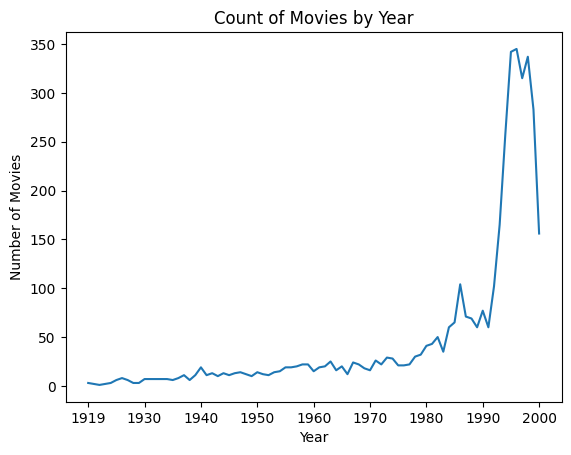

In [23]:
# Number of Movies in dataset by Year

movies_df['Year'].value_counts().sort_index().plot()
plt.ylabel('Number of Movies')
plt.xlabel('Year')
plt.title('Count of Movies by Year')
plt.show()

### Ratings Dataframe - Looking at Distribution of Rating Scores, Years, Months, and Hours

Text(0, 0.5, 'Count')

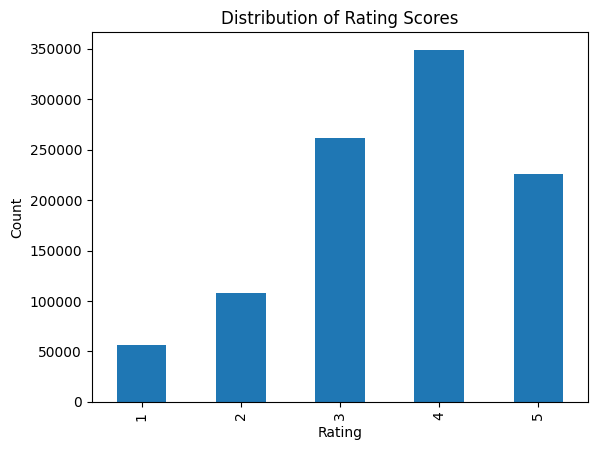

In [24]:
# Plot distribution of rating scores
ratings_df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating Scores')
plt.ylabel('Count')

# There do not appear to be any placeholders for missing vals
# Most ratings are 4 stars, the least amount of ratings are 1 star

Text(0, 0.5, 'Count')

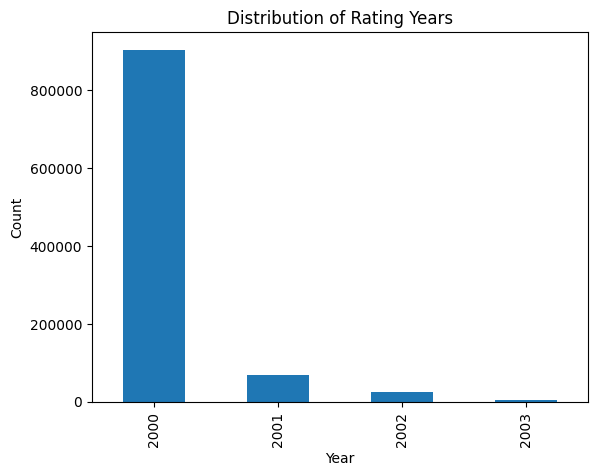

In [25]:
# Convert Timestamp col to datetime objects for visualizations
datetime = pd.to_datetime(ratings_df['Timestamp'], unit='s')

# Plot year of rating
datetime.dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating Years')
plt.xlabel('Year')
plt.ylabel('Count')

# Almost all ratings are from 2000

Text(0, 0.5, 'Count')

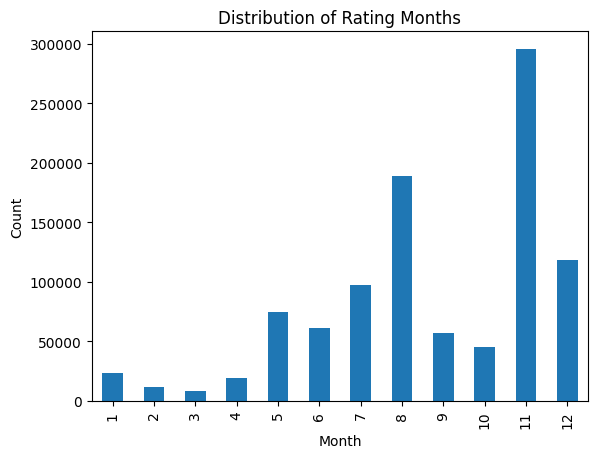

In [26]:
# Plot months of rating
datetime.dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating Months')
plt.xlabel('Month')
plt.ylabel('Count')

# Most ratings are from November

Text(0, 0.5, 'Count')

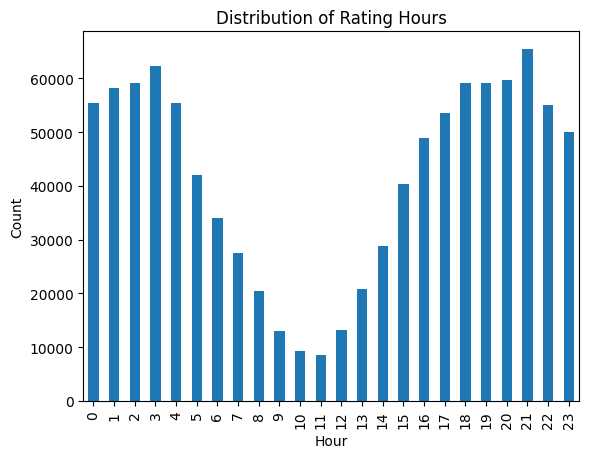

In [27]:
# Plot hour of rating
datetime.dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating Hours')
plt.xlabel('Hour')
plt.ylabel('Count')

# Most ratings happen at the beginning of the day or the end, as that's where peaks happen.

In [28]:
# There do not appear to be any placeholders for null values
ratings_df['UserID'].min(), ratings_df['UserID'].max()

(1, 6040)

In [29]:
# Top 5 user IDs who left the most ratings
ratings_df['UserID'].value_counts()[:5]

UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
Name: count, dtype: int64

In [30]:
# There do not appear to be any placeholders for null values
ratings_df['MovieID'].min(), ratings_df['MovieID'].max()

(1, 3952)

### Users Dataframe - Checking for Distribution of Gender and Age in Users

Text(0, 0.5, 'Count')

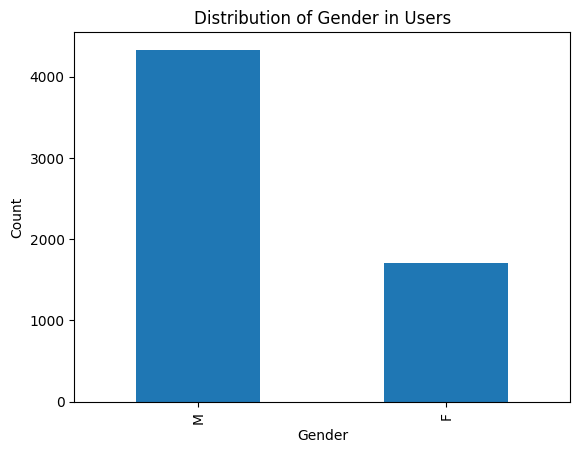

In [31]:
# Distribution of Gender in Users
users_df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender in Users')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

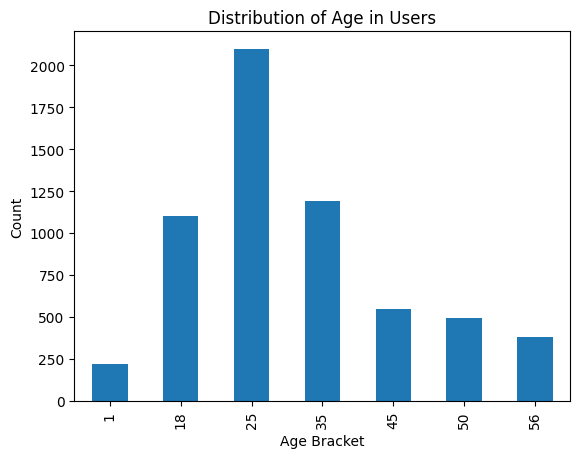

In [32]:
# Distribution of Age in Users
users_df['Age'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Age in Users')
plt.xlabel('Age Bracket')
plt.ylabel('Count')

### Merging Movies Dataframe with Ratings Dataframe on MovieID to Include Rating and UserID Columns

In [33]:
# Merge Movies with Ratings on MovieID

Ratings_and_Movies = pd.merge(merged_df, ratings_df[['MovieID', 'Rating', 'UserID']], on='MovieID')
Ratings_and_Movies

,MovieID,Title,Genres,Year,male_count,gender,name,female_count,Rating,UserID
0,1,Toy Story,Animation|Children's|Comedy,1995,37.0,male,John Lasseter,4.0,5,1
1,1,Toy Story,Animation|Children's|Comedy,1995,37.0,male,John Lasseter,4.0,4,6
2,1,Toy Story,Animation|Children's|Comedy,1995,37.0,male,John Lasseter,4.0,4,8
3,1,Toy Story,Animation|Children's|Comedy,1995,37.0,male,John Lasseter,4.0,5,9
4,1,Toy Story,Animation|Children's|Comedy,1995,37.0,male,John Lasseter,4.0,5,10
...,...,...,...,...,...,...,...,...,...,...
1086284,3952,"Contender, The",Drama|Thriller,2000,NaN,NaN,NaN,NaN,4,5812
1086285,3952,"Contender, The",Drama|Thriller,2000,NaN,NaN,NaN,NaN,3,5831
1086286,3952,"Contender, The",Drama|Thriller,2000,NaN,NaN,NaN,NaN,4,5837
1086287,3952,"Contender, The",Drama|Thriller,2000,NaN,NaN,NaN,NaN,1,5927


### Renaming Columns in New Ratings_and_Movies Dataframe for Clarity, Merging User Demographic Information into This Dataframe, and Removing Null Values

In [34]:
users_df.rename(columns={'Rating': 'User_Rating','Gender': 'User_Gender', 'Age': 'User_Age', 'Occupation': 'User_Occupation', 'Zip-code': 'User_Zip-code'}, inplace=True)

# Merge user demographic info with ratings
Ratings_and_Movies = pd.merge(Ratings_and_Movies, users_df[['UserID', 'User_Gender', 'User_Age', 'User_Occupation', 'User_Zip-code']], on='UserID')

Ratings_and_Movies.rename(columns={'Rating': 'User_Rating'}, inplace=True)

# Remove null values
Ratings_and_Movies = Ratings_and_Movies.dropna(subset=['male_count', 'gender', 'female_count'])

### Enuring That We Are Only Keeping Revelant Columns in Dataframe

In [35]:
# Select relevant columns
Ratings_and_Movies = Ratings_and_Movies[['Title', 'MovieID', 'Genres', 'Year', 'male_count', 'gender', 'female_count', 'User_Rating', 'UserID', 'User_Gender', 'User_Age', 'User_Occupation']]

### Creating Binary Values for Director Gender and User Gender Columns

In [36]:
# Replace 'male' and 'female' with numerical binary values

Ratings_and_Movies['gender'] = Ratings_and_Movies['gender'].replace({'female': 0, 'male': 1})
Ratings_and_Movies['User_Gender'] = Ratings_and_Movies['User_Gender'].replace({'F': 0, 'M': 1})
Ratings_and_Movies

,Title,MovieID,Genres,Year,male_count,gender,female_count,User_Rating,UserID,User_Gender,User_Age,User_Occupation
0,Toy Story,1,Animation|Children's|Comedy,1995,37.0,1,4.0,5,1,0,1,10
1,Pocahontas,48,Animation|Children's|Musical|Romance,1995,3.0,1,0.0,5,1,0,1,10
2,Pocahontas,48,Animation|Children's|Musical|Romance,1995,10.0,1,0.0,5,1,0,1,10
4,Apollo 13,150,Drama,1995,58.0,1,13.0,5,1,0,1,10
6,Star Wars: Episode IV - A New Hope,260,Action|Adventure|Fantasy|Sci-Fi,1977,154.0,1,0.0,4,1,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1086284,Rules of Engagement,3513,Drama|Thriller,2000,61.0,1,0.0,4,5727,1,25,4
1086285,American Psycho,3535,Comedy|Horror|Thriller,2000,1.0,0,7.0,2,5727,1,25,4
1086286,Keeping the Faith,3536,Comedy|Romance,2000,112.0,1,3.0,5,5727,1,25,4
1086287,U-571,3555,Action|Thriller,2000,7.0,1,7.0,3,5727,1,25,4


In [37]:
# Check for null values
Ratings_and_Movies.isnull().sum()

Title              0
MovieID            0
Genres             0
Year               0
male_count         0
gender             0
female_count       0
User_Rating        0
UserID             0
User_Gender        0
User_Age           0
User_Occupation    0
dtype: int64

### Creating New Genre Column and Creating Binary Columns for Each Genre for Clarity. Previously All Genres Were Strings like “Action|Comedy”

In [38]:
# Split the genres column into a list of genres
Ratings_and_Movies['Genres'] = Ratings_and_Movies['Genres'].str.split('|')

# Create a list of unique genres
unique_genres = set(genre for genres_list in Ratings_and_Movies['Genres'] for genre in genres_list)

# Create binary columns for each genre and initialize them with zeros
for genre in unique_genres:
     Ratings_and_Movies[genre] = 0

# Update the binary columns with 1 if the genre is present in the list
for index, row in Ratings_and_Movies.iterrows():
     for genre in row['Genres']:
         Ratings_and_Movies.at[index, genre] = 1

# Drop the original genres column
df = Ratings_and_Movies.drop('Genres', axis=1)

### Creating New Feature - Male & Female Director Proportions

In [39]:
# Find proportion of male directors for each movie
male_prop_dict = dict(df.groupby('MovieID')['gender'].sum() / df.groupby('MovieID')['gender'].count())

### Keep 1 row per Movie per User (multiple rows before due to multiple directors)

In [40]:
# Add column with proportion of male directors & proportion of female directors for each row
df['male_director_proportion'] = df['MovieID'].map(male_prop_dict)
df['female_director_proportion'] =  1 - df['male_director_proportion']

df = df.drop_duplicates( 
  subset = ['MovieID', 'UserID'], 
  keep = 'last').reset_index(drop = True) 

df

,Title,MovieID,Year,male_count,gender,female_count,User_Rating,UserID,User_Gender,User_Age,...,Action,Crime,Drama,Western,Adventure,Documentary,Sci-Fi,Thriller,male_director_proportion,female_director_proportion
0,Toy Story,1,1995,37.0,1,4.0,5,1,0,1,...,0,0,0,0,0,0,0,0,1.0,0.0
1,Pocahontas,48,1995,10.0,1,0.0,5,1,0,1,...,0,0,0,0,0,0,0,0,1.0,0.0
2,Apollo 13,150,1995,58.0,1,13.0,5,1,0,1,...,0,0,1,0,0,0,0,0,1.0,0.0
3,Star Wars: Episode IV - A New Hope,260,1977,154.0,1,0.0,4,1,0,1,...,1,0,0,0,1,0,1,0,1.0,0.0
4,Schindler's List,527,1993,320.0,1,25.0,5,1,0,1,...,0,0,1,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597312,Rules of Engagement,3513,2000,61.0,1,0.0,4,5727,1,25,...,0,0,1,0,0,0,0,1,1.0,0.0
597313,American Psycho,3535,2000,1.0,0,7.0,2,5727,1,25,...,0,0,0,0,0,0,0,1,0.0,1.0
597314,Keeping the Faith,3536,2000,112.0,1,3.0,5,5727,1,25,...,0,0,0,0,0,0,0,0,1.0,0.0
597315,U-571,3555,2000,7.0,1,7.0,3,5727,1,25,...,1,0,0,0,0,0,0,1,1.0,0.0


### Renaming Columns in Finalized Dataframe for Clarity

In [41]:
# Assuming df is your DataFrame
df.columns = df.columns.str.lower()

# If you want to rename specific columns
column_mapping = {
    'Title': 'title',
    'MovieID': 'movie_id',
    'Year': 'year',
    'male_count': 'male_count',
    'gender': 'director_gender',
    'female_count': 'female_count',
    'User_Rating': 'user_rating',
    'UserID': 'user_id',
    'User_Gender': 'user_gender',
    'User_Age': 'user_age',
    'User_Occupation': 'user_occupation',
    'Drama': 'drama',
    'Romance': 'romance',
    'Thriller': 'thriller',
    'Action': 'action',
    'Sci-Fi': 'sci_fi',
    'Adventure': 'adventure',
    'Mystery': 'mystery',
    'Comedy': 'comedy',
    "Children's": 'childrens',
    'Animation': 'animation',
    'War': 'war',
    'Western': 'western',
    'Documentary': 'documentary',
    'Film-Noir': 'film_noir',
    'Horror': 'horror',
    'Fantasy': 'fantasy',
    'Crime': 'crime',
    'Musical': 'musical',
    'male_director_proportion': 'male_director_proportion',
    'female_director_proportion': 'female_director_proportion'
}

df.rename(columns=column_mapping, inplace=True)
df.drop(['male_count', 'female_count'], axis=1, inplace=True)


df

,title,movieid,year,director_gender,user_rating,userid,user_gender,user_age,user_occupation,film-noir,...,action,crime,drama,western,adventure,documentary,sci-fi,thriller,male_director_proportion,female_director_proportion
0,Toy Story,1,1995,1,5,1,0,1,10,0,...,0,0,0,0,0,0,0,0,1.0,0.0
1,Pocahontas,48,1995,1,5,1,0,1,10,0,...,0,0,0,0,0,0,0,0,1.0,0.0
2,Apollo 13,150,1995,1,5,1,0,1,10,0,...,0,0,1,0,0,0,0,0,1.0,0.0
3,Star Wars: Episode IV - A New Hope,260,1977,1,4,1,0,1,10,0,...,1,0,0,0,1,0,1,0,1.0,0.0
4,Schindler's List,527,1993,1,5,1,0,1,10,0,...,0,0,1,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597312,Rules of Engagement,3513,2000,1,4,5727,1,25,4,0,...,0,0,1,0,0,0,0,1,1.0,0.0
597313,American Psycho,3535,2000,0,2,5727,1,25,4,0,...,0,0,0,0,0,0,0,1,0.0,1.0
597314,Keeping the Faith,3536,2000,1,5,5727,1,25,4,0,...,0,0,0,0,0,0,0,0,1.0,0.0
597315,U-571,3555,2000,1,3,5727,1,25,4,0,...,1,0,0,0,0,0,0,1,1.0,0.0


### Director Gender EDA

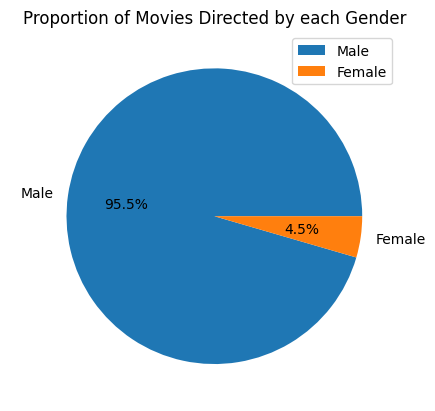

In [42]:
# Proportion of movies in dataset directed by each gender

gender_labels = df['director_gender'].map({1: 'Male', 0: 'Female'})
props = gender_labels.value_counts() / gender_labels.value_counts().sum()
plot = props.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Proportion of Movies Directed by each Gender')
plt.legend(labels=props.index, loc="best")
    
plt.show()

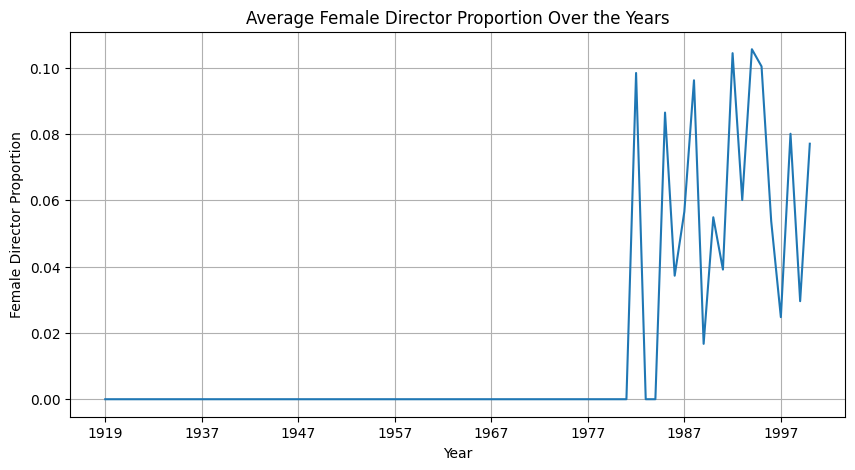

In [43]:
# Average female_director_proportion by year

plt.figure(figsize=(10, 5))
df.groupby('year')['female_director_proportion'].mean().plot()
plt.title('Average Female Director Proportion Over the Years')
plt.xlabel('Year')
plt.ylabel('Female Director Proportion')
plt.grid(True)
plt.show()

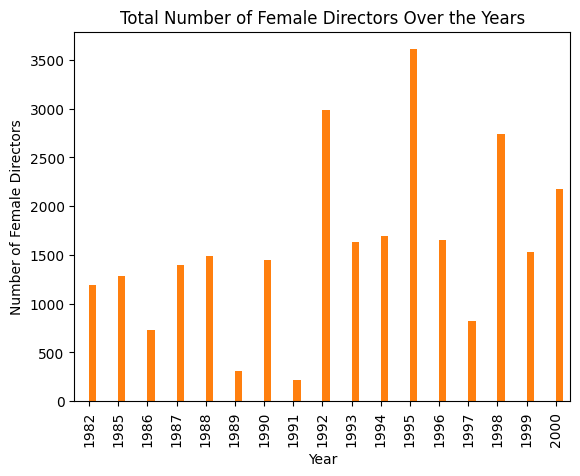

In [44]:
import matplotlib.pyplot as plt

dir_gender_by_year = df.groupby('year')['director_gender'].value_counts().sort_index().reset_index()

female_directors_by_year = dir_gender_by_year[dir_gender_by_year['director_gender'] == 0]

# Setting the year as index
female_directors_by_year.set_index('year', inplace=True)

# Plotting
female_directors_by_year.plot(kind='bar', legend=None)
plt.title('Total Number of Female Directors Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Female Directors')
plt.show()

In [46]:
# Grouping data by gender and genre, and calculating counts
genre_counts_by_gender = df.groupby('director_gender').sum()[['action', "children's", 'comedy', 'adventure', 'fantasy', 'romance', 'drama', 'thriller', 'horror', 'sci-fi', 'crime', 'animation', 'mystery', 'war', 'musical', 'documentary', 'western', 'film-noir']]

# Calculate total movies by gender
total_movies_by_gender = df['director_gender'].value_counts()

# Calculate percentages
genre_percentage_by_gender = genre_counts_by_gender.div(total_movies_by_gender, axis=0) * 100

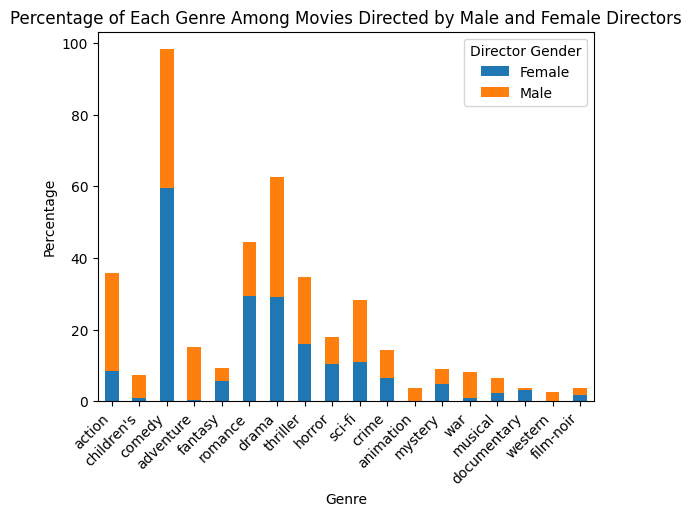

In [47]:
# Plotting
ax = genre_percentage_by_gender.transpose().plot(kind='bar', stacked=True)

# Set custom x-axis labels
ax.set_xticks(range(len(genre_percentage_by_gender.columns)))
ax.set_xticklabels(genre_percentage_by_gender.columns, rotation=45, ha='right')

# Set custom legend
plt.legend(title='Director Gender', labels=['Female', 'Male'])

plt.title('Percentage of Each Genre Among Movies Directed by Male and Female Directors')
plt.xlabel('Genre')
plt.ylabel('Percentage')

plt.show()

### Director Bias EDA

In [49]:
users_df

,UserID,User_Gender,User_Age,User_Occupation,User_Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [51]:
merged_users = ratings_df.merge(users_df[['UserID', 'User_Age', 'User_Gender', 'User_Occupation']], on='UserID')
merged_users['User_Gender'] = merged_users['User_Gender'].replace({'F': 0, 'M': 1})

Proportion of Star Ratings per Gender:
user_rating             1         2         3        4         5
director_gender                                                 
0                0.066238  0.128610  0.302345  0.34814  0.154667
1                0.056938  0.110138  0.264494  0.34692  0.221511


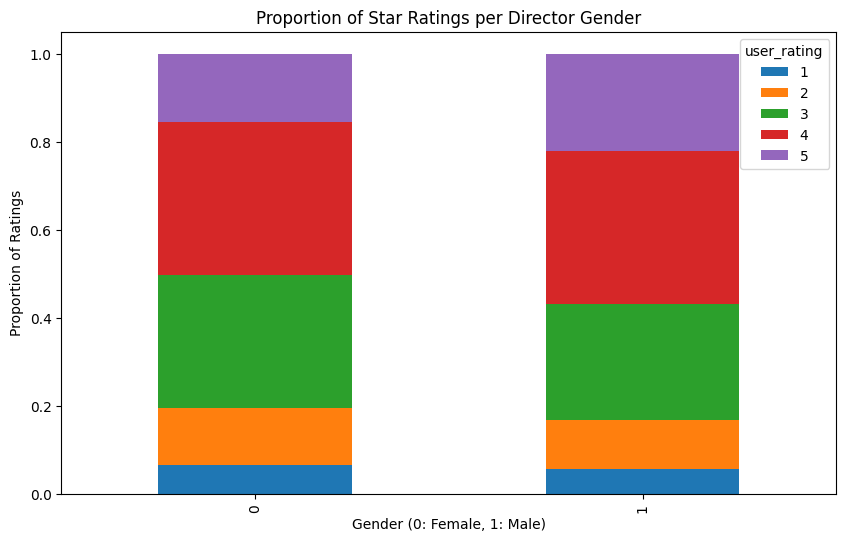

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Director Gender and Rating received, then calculate the count
grouped_data_gender = df.groupby(['director_gender', 'user_rating']).size().unstack().fillna(0)

# Calculate the total count of ratings received for each director gender
total_ratings_by_gender = df['director_gender'].value_counts()

# Calculate proportions by dividing each count by the total count of ratings received for each director gender
proportion_data_gender = grouped_data_gender.div(total_ratings_by_gender, axis=0)

# Print the specific values
print("Proportion of Star Ratings per Gender:")
print(proportion_data_gender)

# Plot the bar plot
proportion_data_gender.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Proportion of Ratings')
plt.title('Proportion of Star Ratings per Director Gender')

# Show the plot
plt.show()

### Checking for Bias with AIF360

#### Remove non-numerical column (title) to make dataset compatible with AIF360

In [53]:
movie_titles = df['title']
df = df.drop('title', axis=1)
df

,movieid,year,director_gender,user_rating,userid,user_gender,user_age,user_occupation,film-noir,mystery,...,action,crime,drama,western,adventure,documentary,sci-fi,thriller,male_director_proportion,female_director_proportion
0,1,1995,1,5,1,0,1,10,0,0,...,0,0,0,0,0,0,0,0,1.0,0.0
1,48,1995,1,5,1,0,1,10,0,0,...,0,0,0,0,0,0,0,0,1.0,0.0
2,150,1995,1,5,1,0,1,10,0,0,...,0,0,1,0,0,0,0,0,1.0,0.0
3,260,1977,1,4,1,0,1,10,0,0,...,1,0,0,0,1,0,1,0,1.0,0.0
4,527,1993,1,5,1,0,1,10,0,0,...,0,0,1,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597312,3513,2000,1,4,5727,1,25,4,0,0,...,0,0,1,0,0,0,0,1,1.0,0.0
597313,3535,2000,0,2,5727,1,25,4,0,0,...,0,0,0,0,0,0,0,1,0.0,1.0
597314,3536,2000,1,5,5727,1,25,4,0,0,...,0,0,0,0,0,0,0,0,1.0,0.0
597315,3555,2000,1,3,5727,1,25,4,0,0,...,1,0,0,0,0,0,0,1,1.0,0.0


In [54]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

# Define the protected attributes
protected_attributes = ['male_director_proportion']

# Define the favorable and unfavorable labels
favorable_classes = [5]  # Assuming 5 is a high rating (favorable)

# Create a StandardDataset
dataset = StandardDataset(df, label_name='user_rating', favorable_classes=favorable_classes,
                          protected_attribute_names=protected_attributes,
                          privileged_classes=[[1]])  # Only one class for User_Gender (e.g., male is privileged)

# Calculate the disparate impact before any mitigation
metric_before = BinaryLabelDatasetMetric(dataset, unprivileged_groups=[{'male_director_proportion': 0}],
                                         privileged_groups=[{'male_director_proportion': 1}])
disparate_impact_before = metric_before.disparate_impact()

print("Disparate Impact Before Mitigation:", disparate_impact_before)
print("Statistical Parity Difference Before Mitigation:", metric_before.statistical_parity_difference())

# Apply Reweighing as a bias mitigation technique
rw = Reweighing(unprivileged_groups=[{'male_director_proportion': 0}], privileged_groups=[{'male_director_proportion': 1}])
dataset_transformed = rw.fit_transform(dataset)

# Calculate the disparate impact after mitigation
metric_after = BinaryLabelDatasetMetric(dataset_transformed, unprivileged_groups=[{'male_director_proportion': 0}],
                                        privileged_groups=[{'male_director_proportion': 1}])
disparate_impact_after = metric_after.disparate_impact()

print("Disparate Impact After Mitigation:", disparate_impact_after)
print("Statistical Parity Difference After Mitigation:", metric_after.statistical_parity_difference())

Disparate Impact Before Mitigation: 0.6975277061162154
Statistical Parity Difference Before Mitigation: -0.06725381287027984
Disparate Impact After Mitigation: 1.0000000000000004
Statistical Parity Difference After Mitigation: 8.326672684688674e-17


### Analysis from Disparate Impact Score:
- The output 'Disparate Impact Before Mitigation: 0.6975277061162154 indicates a disparate impact of 0.69, suggesting bias in ratings based on the director's gender. Since 69% falls under the 3/4ths rule, it signifies a substantial bias. In the context of disparate impact, this value reflects an imbalance, indicating that certain groups, possibly based on gender, may be disproportionately affected by the ratings.

### Linear Regression Model to Predict User Rating Based on Selected Features

In [55]:
# Suppress FutureWarnings related to is_sparse
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

In [56]:
# Predict Rating Model

# Select features and target variable

features = ['user_age', 'user_occupation', 'documentary', 'romance', 'fantasy', 'western', 'thriller',
            'children\'s', 'film-noir', 'drama', 'comedy', 'adventure', 'horror', 'crime', 'action', 'mystery', 'war', 'musical', 'animation', 'sci-fi', 'male_director_proportion']

target = 'user_rating'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# With director gender proportions: MSE = 1.1814336725581673
# With director_gender column: MSE = 1.1817967538904501
# Without director gender proportions: MSE = 1.183496311127169

# Slightly more accurate when you INCLUDE director gender 
# Most accurate when you only include director gender proportion

Mean Squared Error: 1.189992414441394


### Same Linear Regression Model, but Filtering for Gender Director Proportion Separately to Observe Any Potential Bias in Ratings

In [57]:
#Predicting rating for men and women
# Select common features
common_features = ['user_age', 'user_occupation', 'documentary', 'romance', 'fantasy', 'western', 'thriller',
            'children\'s', 'film-noir', 'drama', 'comedy', 'adventure', 'horror', 'crime', 'action', 'mystery', 'war', 'musical', 'animation', 'sci-fi', 'male_director_proportion','male_director_proportion']

# Filter data for men and women separately
df_men = df[df['director_gender'] == 1]
df_women = df[df['director_gender'] == 0]

# Function to train and evaluate a model
def train_and_evaluate(data, gender):
    X = data[common_features]
    y = data['user_rating']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for {gender}: {mse}')

# Train and evaluate models for men and women
train_and_evaluate(df_men, 'Men')
train_and_evaluate(df_women, 'Women')

# Analysis on output: Predicting Rating for women directed movies gave a lower MSE, so more accurate for predicting ratings for female directed movies?

Mean Squared Error for Men: 1.2072712973748292
Mean Squared Error for Women: 1.1541519341943054


### Built Recommender System for Recommending Top 5 Movies to Users Based on Jaccard Similarity

In [58]:
# Create a Movie-User matrix
movie_user_matrix = df.pivot_table(index='movieid', columns='userid', values='user_rating', fill_value=0)

# Function to calculate Jaccard similarity between two movies
def calculate_jaccard_similarity(movie1, movie2):
    intersection = sum((movie1 > 0) & (movie2 > 0))
    union = sum((movie1 > 0) | (movie2 > 0))
    
    if union == 0:
        return 0
    
    return intersection / union

# Function to generate movie recommendations based on Jaccard similarity
def generate_movie_recommendations(user_id, movie_user_matrix, df_movies, top_n=5):
    # Get movies already rated by the user
    user_rated_movies = movie_user_matrix[user_id][movie_user_matrix[user_id] > 0].index
    
    # Initialize an empty DataFrame to store recommendations
    recommendations = pd.DataFrame(columns=['movieid'])
    
    for movie_id in user_rated_movies:
        target_movie_ratings = movie_user_matrix.loc[movie_id]
        similarities = movie_user_matrix.apply(lambda x: calculate_jaccard_similarity(target_movie_ratings, x), axis=1)
    
        # Sort movies by Jaccard similarity in descending order
        similar_movies = similarities.sort_values(ascending=False)
    
        # Exclude movies already rated by the user
        similar_movies = similar_movies.drop(user_rated_movies)
    
        # Append recommendations to the DataFrame
        recommendations = pd.concat([recommendations, similar_movies.head(top_n).reset_index()], ignore_index=True)
    
    # Drop duplicates and keep the top N recommendations
    recommendations = recommendations.drop_duplicates().head(top_n)
    
    # Rename the column '0' to 'Jaccard_Score'
    recommendations = recommendations.rename(columns={0: 'Jaccard_Similarity'})
    
    return recommendations

### Find top 5 movies for any given user ID

In [59]:
# Example: Recommend top 5 movies for User ID 1
user_id_to_recommend = 1
recommended_movies = generate_movie_recommendations(user_id_to_recommend, movie_user_matrix, df[['movieid']], top_n=5)

print(f"Top 5 Recommended Movies for User ID {user_id_to_recommend}:\n", recommended_movies)

Top 5 Recommended Movies for User ID 1:
   movieid  Jaccard_Similarity
0    1265            0.459450
1     356            0.403549
2    1580            0.394260
3    2396            0.382033
4    1196            0.379151


### Plotted director gender proportion of top 5 movies recommended to user

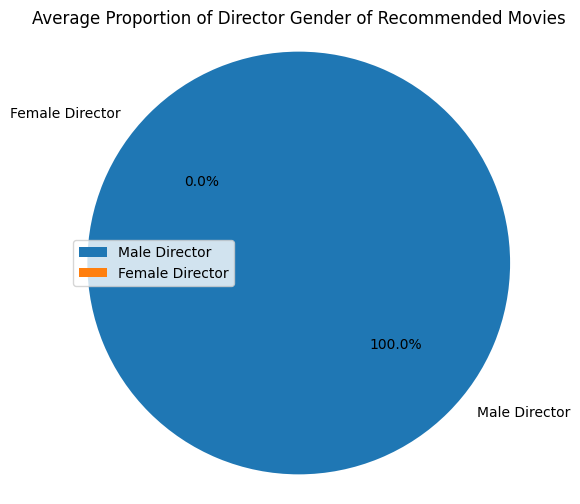

In [60]:
# Calculate mean male director proportion of recommended movies
mean_male_director_proportion = df[df['movieid'].isin(list(recommended_movies['movieid']))].drop_duplicates(subset='movieid')['male_director_proportion'].mean()

# Calculate female director proportion
mean_female_director_proportion = 1 - mean_male_director_proportion

# Data for the pie chart
labels = ['Male Director', 'Female Director']
sizes = [mean_male_director_proportion, mean_female_director_proportion]

# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Average Proportion of Director Gender of Recommended Movies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adding legend and labels
plt.legend()

# Show plot
plt.show()

### Plotted director gender proportion based on user's watch history

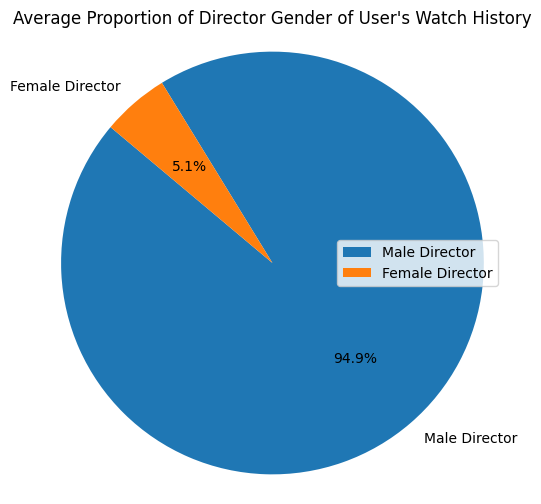

In [61]:
# Average male director proportion of movies watched by user
mean_male_director_proportion = df[df['userid'] == user_id_to_recommend]['male_director_proportion'].mean()

# Calculate female director proportion
mean_female_director_proportion = 1 - mean_male_director_proportion

# Data for the pie chart
labels = ['Male Director', 'Female Director']
sizes = [mean_male_director_proportion, mean_female_director_proportion]

# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Average Proportion of Director Gender of User's Watch History")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adding legend and labels
plt.legend()

# Show plot
plt.show()